In [1]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [3]:
ps = ps[["Date", "File", "Post patch?", "Time spent extracting cytosol", "patch duration", ">400", "SM_QC_PF", "Bad dates"]]
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps.dropna(subset = ["Post patch?", "Time spent extracting cytosol", "patch duration", "SM_QC_PF"], inplace = True)
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='force')
ps[">400"] = pd.to_numeric(ps[">400"].str.replace(' ',''), errors ='force')
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["Bad dates"] != "x"]
ps = ps.drop("Bad dates", 1)
ps = ps[ps[">400"] < 10000]
ps.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
29,2016-04-07,Ndnf - kjh_160407_03,Nucleated patch,5.0,8.0,96.00,pass
30,2016-04-07,Ndnf - kjh_160407_04,Partial-Nucleus,5.0,7.0,111.00,pass
31,2016-04-07,Ndnf - kjh_160407_05,Entire-Cell?,5.0,7.0,27.30,fail
32,2016-04-07,Ndnf - kjh_160407_06,Outside-Out,5.0,7.0,18.76,fail
33,2016-04-07,Ndnf - kjh_160407_07,Outside-Out,2.0,4.0,100.00,pass


In [4]:
ps["Post patch?"].value_counts()

Outside-Out                       779
Nucleated                         562
No-Seal                           543
Partial-Nucleus                   307
Entire-Cell                        25
no-seal                             4
Entire-Cell?                        2
outside-out                         1
nucleus                             1
nucelated                           1
no -seal                            1
n                                   1
leaky Outside-Out                   1
Nucleated patch                     1
Nucleated (maybe Entire-Cell?)      1
Name: Post patch?, dtype: int64

In [5]:
ps = ps[ps["Date"] >= "2017-01-01"]
#ps.head()
ps["Post patch?"].value_counts()

Nucleated                         423
No-Seal                           408
Outside-Out                       376
Partial-Nucleus                   163
Entire-Cell                        16
no-seal                             4
outside-out                         1
nucelated                           1
no -seal                            1
nucleus                             0
n                                   0
leaky Outside-Out                   0
Nucleated patch                     0
Nucleated (maybe Entire-Cell?)      0
Entire-Cell?                        0
Name: Post patch?, dtype: int64

In [6]:
#ps["Time spent extracting cytosol"].sort_values()

In [7]:
#ps["Time spent extracting cytosol"].value_counts()

In [8]:
ps["cytosol extraction time bins"] = ps["Time spent extracting cytosol"].astype(int)
#ps.info()
#ps["cytosol extraction time bins"].sort_values()
mask1 = ps["Post patch?"] == "Outside-Out"
mask2 = ps["Post patch?"] == "Nucleated"
mask3 = ps["Post patch?"] == "No-Seal"
mask4 = ps["Post patch?"] == "Partial-Nucleus"
mask5 = ps["Post patch?"] == "Entire-Cell"
oo = ps[mask1]
nu = ps[mask2]
ns = ps[mask3]
pn = ps[mask4]
ec = ps[mask5]


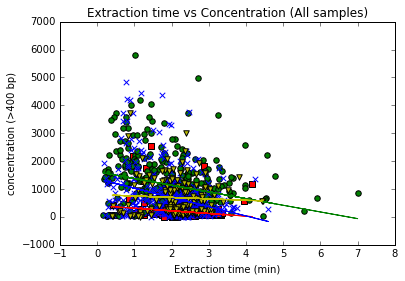

In [19]:
x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

def make_plots(x,y,c,m):
    plt.scatter(x,y,s=30,c=c,marker=m)

make_plots(x1,y1,"r","s")
make_plots(x2,y2,"g","o")
make_plots(x3,y3,"b","x")
make_plots(x4,y4,"y","v")

plt.title('Extraction time vs Concentration (All samples)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

def fit_plots(x,y,c):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),c)
    
fit_plots(x1,y1,"r")
fit_plots(x2,y2,"g")
fit_plots(x3,y3,"b")
fit_plots(x4,y4,"y")

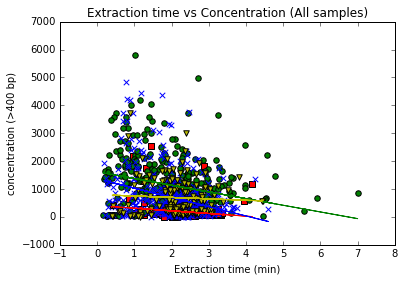

In [209]:
x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

#y = ps[">400"].where(mask5)
#b = ps[">400"].where(mask2)
#c = ps[">400"].where(mask3)
#fig = plt.figure()
#ax1 = fig.add_subplot(111)

plt.scatter(x1,y1,s=30,c='r',marker='s')
plt.scatter(x2,y2,s=30,c='g',marker='o')
plt.scatter(x3,y3,s=30,c='b',marker='x')
plt.scatter(x4,y4,s=30,c='y',marker='v')

plt.title('Extraction time vs Concentration (All samples)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

#try to define a function here that you can reuse and call for each set of x,y values, blah blah blah
z = np.polyfit(x1,y1,1)
p = np.poly1d(z)
plt.plot(x1,p(x1),"r")

y = np.polyfit(x2,y2,1)
o = np.poly1d(y)
plt.plot(x2,o(x2),"g")

x = np.polyfit(x3,y3,1)
n = np.poly1d(x)
plt.plot(x3,n(x3),"b")

w = np.polyfit(x4,y4,1)
m = np.poly1d(w)
plt.plot(x4,m(x4),"y")

#ps.plot(kind = "scatter", x = "Time spent extracting cytosol", y = ">400")


In [22]:
ps_pass = ps[ps["SM_QC_PF"] == "pass"]
ps_pass.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF,cytosol extraction time bins
3153,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.01,Outside-Out,2.116667,12.316667,192.0,pass,2
3160,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.01,Outside-Out,2.116667,11.950000,195.0,pass,2
3161,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.02,Outside-Out,2.316667,13.466667,179.0,pass,2
3162,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.04.02.01,No-Seal,2.233333,12.416667,166.0,pass,2
3175,2017-01-11,Gad2-IRES-Cre;Ai14-293418.06.02.01,Partial-Nucleus,2.350000,12.116667,148.0,pass,2


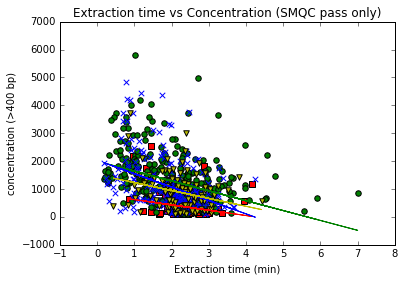

In [23]:
mask1 = ps_pass["Post patch?"] == "Outside-Out"
mask2 = ps_pass["Post patch?"] == "Nucleated"
mask3 = ps_pass["Post patch?"] == "No-Seal"
mask4 = ps_pass["Post patch?"] == "Partial-Nucleus"
mask5 = ps_pass["Post patch?"] == "Entire-Cell"
oo = ps_pass[mask1]
nu = ps_pass[mask2]
ns = ps_pass[mask3]
pn = ps_pass[mask4]
ec = ps_pass[mask5]

x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

def make_plots(x,y,c,m):
    plt.scatter(x,y,s=30,c=c,marker=m)

make_plots(x1,y1,"r","s")
make_plots(x2,y2,"g","o")
make_plots(x3,y3,"b","x")
make_plots(x4,y4,"y","v")

plt.title('Extraction time vs Concentration (SMQC pass only)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

def fit_plots(x,y,c):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),c)

fit_plots(x1,y1,"r")
fit_plots(x2,y2,"g")
fit_plots(x3,y3,"b")
fit_plots(x4,y4,"y")    

plt.savefig('extraction_vs_conc.png')

In [50]:
zero_one = ps[ps["cytosol extraction time bins"] == 0]
z_1_total = zero_one["cytosol extraction time bins"].count()
z_1_total

23

In [52]:
zero_one_pass = zero_one[zero_one["SM_QC_PF"] == "pass"]
z_1_pass = zero_one_pass["SM_QC_PF"].count()
z_1_pass

15

In [55]:
z_1_pp = float(z_1_pass) / z_1_total
print "0 to 1 minute pass percentage =", z_1_pp

0 to 1 minute pass percentage = 0.652173913043


In [57]:
one_two = ps[ps["cytosol extraction time bins"] == 1]
o_2_total = one_two["cytosol extraction time bins"].count()
o_2_total

254

In [68]:
one_two_pass = one_two[one_two["SM_QC_PF"] == "pass"]
o_2_pass = one_two_pass["SM_QC_PF"].count()
o_2_pass

171

In [73]:
o_2_pp = float(o_2_pass) / o_2_total
print "1 to 2 minute pass percentage =", o_2_pp

1 to 2 minute pass percentage = 0.673228346457


In [71]:
two_three = ps[ps["cytosol extraction time bins"] == 2]
t_3_total = two_three["cytosol extraction time bins"].count()
t_3_total

778

In [74]:
two_three_pass = two_three[two_three["SM_QC_PF"] == "pass"]
t_3_pass = two_three_pass["SM_QC_PF"].count()
t_3_pass

423

In [75]:
t_3_pp = float(t_3_pass) / t_3_total
print "two to three minute pass percentage =", t_3_pp

two to three minute pass percentage = 0.543701799486


In [26]:
three_four = ps[ps["cytosol extraction time bins"] == 3]
t_4_total = three_four["cytosol extraction time bins"].count()
t_4_total

94

In [27]:
three_four_pass = three_four[three_four["SM_QC_PF"] == "pass"]
t_4_pass = three_four_pass["SM_QC_PF"].count()
t_4_pass

62

In [31]:
t_4_pp = float(t_4_pass) / t_4_total
print "three to fourt minute pass percentage =", t_4_pp

three to fourt minute pass percentage = 0.659574468085


In [32]:
four_five = ps[ps["cytosol extraction time bins"]  == 4]
f_5_total = four_five["cytosol extraction time bins"].count()
f_5_total

11

In [34]:
four_five_pass = four_five[four_five["SM_QC_PF"] == "pass"]
f_5_pass = four_five_pass["SM_QC_PF"].count()
f_5_pass

8

In [36]:
f_5_pp = float(f_5_pass) / f_5_total
print "four to five minute pass percentage =", f_5_pp

four to five minute pass percentage = 0.727272727273


In [37]:
five_six = ps[ps["cytosol extraction time bins"] == 5]
f_5_total = five_six["cytosol extraction time bins"].count()
f_5_total

2